In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Reading the csv file
data=pd.read_csv("Mall_Customers.csv")

In [3]:
# first 5 instances of dataset

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# last 5 instances of dataset

data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#Shape of dataframe

data.shape

(200, 5)

In [6]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
# droping Id column

data.drop("CustomerID",axis=1,inplace=True)

In [8]:
# Checking Dataset

data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## 2. Familiarizing with Data

In [9]:
#Find missing values
print("Missing values:")
data.isnull().sum()

Missing values:


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# describtion of dataset

data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
# info about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [12]:
#no. of classes in Dataset

data.nunique()

Genre                      2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

## 3.Visualizing Data

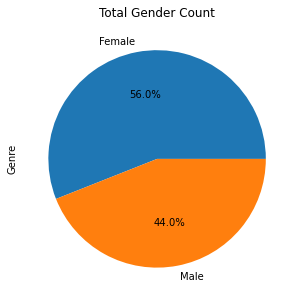

In [13]:
# pie chart for "Total Gender Count"

data['Genre'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Total Gender Count")
plt.show()


In [14]:
# LabelEncoder for encoding binary categories in a column
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
le = LabelEncoder()  
# One single vector so it is ovbious what we want to encode
data["Genre"] = le.fit_transform(data["Genre"])

In [15]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [16]:
#We take just the Annual Income and Spending score
X=data[["Annual Income (k$)","Spending Score (1-100)"]]

In [17]:
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


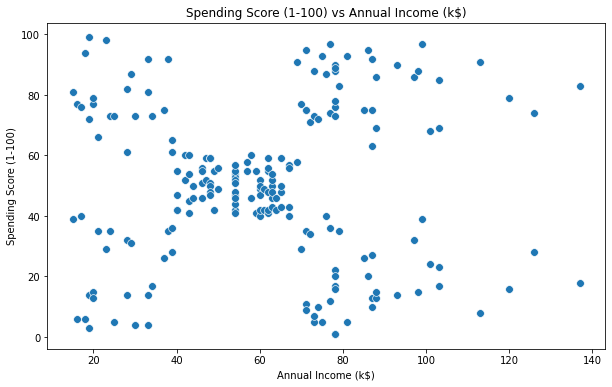

In [18]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [19]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.

In [20]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\mapar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


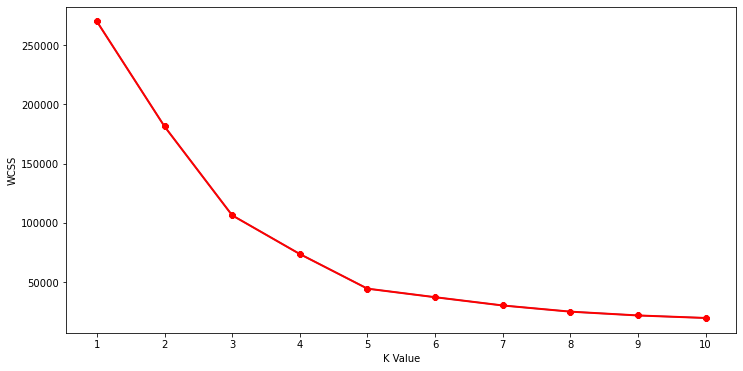

In [21]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

we choose the k for which WSS first starts to become more smaller. 

In [22]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,0
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


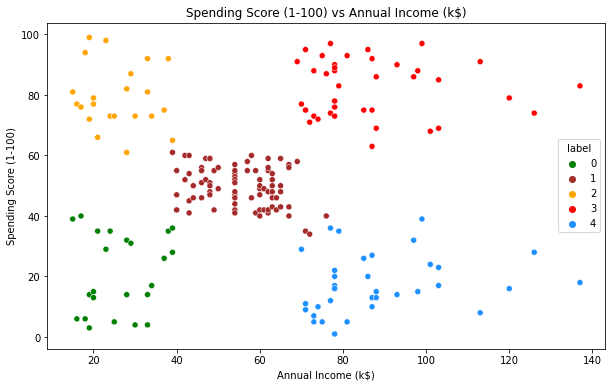

In [23]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','brown','orange','red','dodgerblue'],data = data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## 5. Splitting of Data

In [24]:
X=data.iloc[:,:4]
y=data.iloc[:,-1]

In [25]:
# Splitting of dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape of train Test Split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(160, 4) (160,)
(40, 4) (40,)


In [26]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(X_train)

#predicting the target value from the model for the samples
y_train_km = km.predict(X_train)
y_test_km = km.predict(X_test)

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score

acc_train_gmm = adjusted_rand_score(y_train,y_train_km)
acc_test_gmm = adjusted_rand_score(y_test,y_test_km)

print("K mean : Accuracy on training Data: {:.3f}".format(acc_train_gmm))
print("K mean : Accuracy on test Data: {:.3f}".format(acc_test_gmm))

K mean : Accuracy on training Data: 0.965
K mean : Accuracy on test Data: 1.000


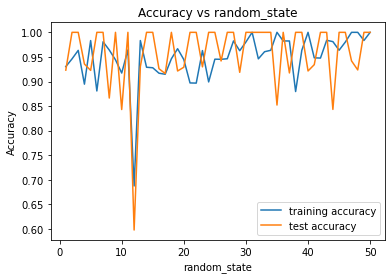

In [28]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 50
depth = range(1,51)
for n in depth:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)
    
    km=KMeans(n_clusters=5)
    km.fit(X_train)
    # record training set accuracy
    training_accuracy.append(adjusted_rand_score(y_train,km.predict(X_train)))
    # record generalization accuracy
    test_accuracy.append(adjusted_rand_score(y_test,km.predict(X_test)))
    

#plotting the training & testing accuracy for max_depth from 1 to 50
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.title("Accuracy vs random_state")
plt.ylabel("Accuracy")  
plt.xlabel("random_state")
plt.legend();